### Импорт нужных библиотек

In [1]:
import numpy as np
import pandas as pd
import scipy as scipy

from sklearn import model_selection, datasets, linear_model, metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка датасета

In [2]:
df = pd.read_csv('fraud_opers.csv', index_col=0)

### Предобработка данных

In [3]:
# Посмотрим на первые 5 записей датасета
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93628,7577.0,-0.318075,1.062283,1.759506,1.003932,0.426871,0.449983,0.604184,-0.124242,0.680586,...,-0.199046,-0.065634,-0.163249,-0.574275,-0.229511,-0.414992,0.214577,-0.031305,36.00,0
126144,147017.0,2.011594,-1.073354,-0.713937,-0.649853,-0.699839,0.299173,-0.950702,0.134623,-0.263002,...,-0.580310,-1.301397,0.432775,0.139274,-0.720074,0.207722,-0.033734,-0.037526,64.90,0
20433,81723.0,1.265740,0.405756,-0.141166,1.122550,-0.066379,-1.218373,0.485565,-0.295400,-0.114928,...,-0.006241,-0.025107,-0.136889,0.377040,0.813843,-0.293395,-0.016050,0.009568,6.98,0
142035,90006.0,1.973892,-0.589606,0.043128,0.315322,-0.603262,0.571729,-1.240431,0.128551,2.830702,...,0.023322,0.435361,0.175779,0.035006,-0.466881,0.593365,-0.030438,-0.035833,34.90,0
83963,70838.0,0.637828,-1.413198,0.698928,0.219555,-1.420851,0.115959,-0.510338,0.213211,1.030303,...,0.071062,-0.360377,-0.231713,0.050643,-0.026698,0.967458,-0.101939,0.050154,297.78,0


In [4]:
# Проверим типы данных и наличие в них пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14265 entries, 93628 to 22414
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    14265 non-null  float64
 1   V1      14265 non-null  float64
 2   V2      14265 non-null  float64
 3   V3      14265 non-null  float64
 4   V4      14265 non-null  float64
 5   V5      14265 non-null  float64
 6   V6      14265 non-null  float64
 7   V7      14265 non-null  float64
 8   V8      14265 non-null  float64
 9   V9      14265 non-null  float64
 10  V10     14265 non-null  float64
 11  V11     14265 non-null  float64
 12  V12     14265 non-null  float64
 13  V13     14265 non-null  float64
 14  V14     14265 non-null  float64
 15  V15     14265 non-null  float64
 16  V16     14265 non-null  float64
 17  V17     14265 non-null  float64
 18  V18     14265 non-null  float64
 19  V19     14265 non-null  float64
 20  V20     14265 non-null  float64
 21  V21     14265 non-null  float64

### Посмотрим на доли классов 0 и 1

<AxesSubplot:>

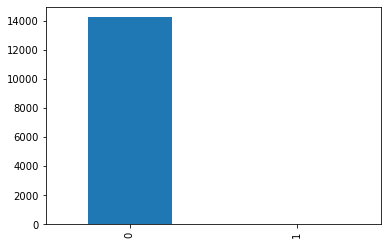

In [5]:
count_classes = pd.value_counts(df['Class'], sort = False)
count_classes.plot (kind='bar')

In [6]:
norm_percentage = df['Class'].value_counts()[0]/(len(df))
mosh_percentage = df['Class'].value_counts()[1]/(len(df))
d = {'Нормальная операция': norm_percentage, 'Мошенническая операция': mosh_percentage}
percentages = pd.DataFrame(data = d, index=[0])
percentages

,Нормальная операция,Мошенническая операция
0,0.996986,0.003014


Как мы видим у нас большой дисбаланс классов, что может плохо сказаться на результатах обучения.

### Гистограммы для столбцов "Amount" и "Time"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount'>

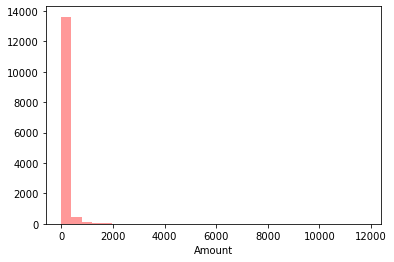

In [7]:
sns.distplot(df['Amount'], kde=False, color='red', bins=30)

<AxesSubplot:xlabel='Time'>

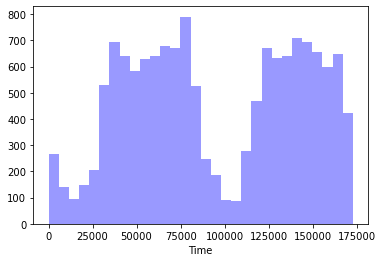

In [8]:
sns.distplot(df['Time'], kde=False, color='blue', bins=30)

Как можно видеть - столбцы необходимо отмасштабировать

In [9]:
from sklearn.preprocessing import RobustScaler

rob_scale = RobustScaler()

df['scaled_amount']=rob_scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_Time']=rob_scale.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'], axis=1,inplace=True)

### Обучение модели

In [108]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [109]:
train_set['Class'].value_counts()

0    11373
1       39
Name: Class, dtype: int64

In [110]:
norm_instances = train_set[train_set['Class'] == 0]
mosh_instances = train_set[train_set['Class'] == 1]

Поскольку мы имеем дело с несбалансированностью данных, было принято решение использовать undersampling обучающих данных,
иначе бы мы получили неверные метрики.

In [111]:
#norm_instances_sample = norm_instances.sample(n = 3*(len(mosh_instances)))

In [112]:
#train_reduced = pd.concat([norm_instances_sample,mosh_instances], axis = 0)
#train_reduced.shape

(156, 31)

In [133]:
train_y = train_set['Class']
train_x = train_set.drop('Class', axis = 1)

In [134]:
test_y = test_set['Class']
test_x = test_set.drop('Class', axis = 1)

Для обучения была использована простая логистическая регрессия, она неплохо справляется с классификацией на бинарных классах, 
тем более наши признаки вещественные числа.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression(random_state = 23)
classifier.fit(train_x, train_y)
cv_score = cross_val_score(classifier, train_x, train_y, cv=5)

In [136]:
cv_score.mean()

0.998948406140267

Получили хорошую метрику accuracy после кросс-валидации

In [144]:
train_y_pred = classifier.predict(train_x)

In [145]:
test_y_pred = classifier.predict(test_x)

print(metrics.accuracy_score(test_y, test_y_pred))

0.9996494917630564


In [139]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_pred)

array([[2848,    1],
       [   0,    4]], dtype=int64)

In [141]:
from sklearn.metrics import classification_report

print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2849
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2853
   macro avg       0.90      1.00      0.94      2853
weighted avg       1.00      1.00      1.00      2853



Также на тестовых данных, судя по метрикам, алгоритм хорошо справился с классификацией. Построим ROC-кривую и рассчитаем AUC.

In [142]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, test_y_pred, pos_label = 1)
roc_auc = metrics.auc(fpr, tpr)

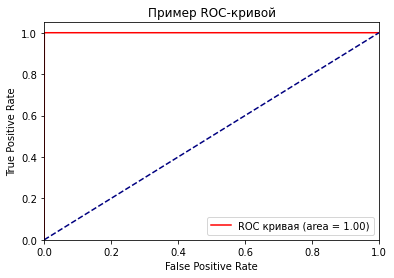

In [143]:
plt.plot(fpr, tpr, color='red',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

Как можно видеть по метрикам качества и ROC-AUC классификатор отлично справился со своей задачей. В ходе решения было выяснено то, что нет смысла бороться с несбалансированностью классов путем undersampling'a, поскольку так алгоритм плохо справлялся с нужным нам предсказанием 1 класса (это было видно по метрикам precision и f1-score), то есть плохо предсказывал мошеннические операции.